# Assignment 02

Name : Nimna Alupotha Gamage (NIMNA A. G. T.) - Index No.: s14682 - Reg. No. : 2019s17241 - Faculty : Science

# Importing Libraries

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan

#importing Tensorflow and Keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

#importing sklearn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Importing Dataset

In [244]:
dataset = pd.read_csv('household_power_consumption.txt', sep = ';',
                  parse_dates = True,
                  low_memory = False)

In [245]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [246]:
dataset.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
2075258,26/11/2010,21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


In [247]:
#represent both date and time columns in a single 'date_time' column

dataset['date_time'] = dataset['Date'].str.cat(dataset['Time'], sep= ' ')
dataset.drop(['Date', 'Time'], inplace= True, axis = 1)
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [248]:
dataset.set_index(['date_time'], inplace=True)
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
16/12/2006 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
16/12/2006 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
16/12/2006 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
16/12/2006 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Data Cleaning

Cleaning the dataset is one of the pre-processing techniques.

In [249]:
#mark unknown characters with NaN value(float)

dataset.replace('?', nan, inplace=True)

In [250]:
dataset = dataset.astype('float')

#increase the efficiency of the data

In [251]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7+ MB


In [252]:
#Check whether the unknown values are present in the dataset

np.isnan(dataset).sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [253]:
#introduce a function to fill in the missing values

def fill_missing_values(dataset):
    one_day = 24*60
    for row in range(dataset.shape[0]):
        for col in range(dataset.shape[1]):
            if np.isnan(dataset[row, col]):
                dataset[row, col] = dataset[row-one_day, col]

In [254]:
#calling the 'fill_missing_values' function

fill_missing_values(dataset.values)

In [255]:
#check again for unknown values

np.isnan(dataset).sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [256]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7+ MB


In [257]:
dataset.shape

(2075259, 7)

There are 2075259 datapoints and 7 features in the dataset.

In [258]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [259]:
#save the cleaned dataset as 'cleaned_dataset.csv'

dataset.to_csv('cleaned_dataset.csv')

In [260]:
new_dataset = pd.read_csv('cleaned_dataset.csv', parse_dates = True, index_col = 'date_time', low_memory = False)

In [261]:
new_dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [262]:
new_dataset.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [263]:
#sampling data into daywise manner

data = new_dataset.resample('D').sum()

In [264]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [265]:
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0
2010-12-11,1836.822,151.144,343926.57,7826.2,2054.0,489.0,10308.0


# Spliting the Dataset

In [266]:
#dataset upto 2009-09-30 is in train dataset and remaining is in the test dataset

data_train = data.loc[:'2009-12-31', :]['Global_active_power']
data_train.head()

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Freq: D, Name: Global_active_power, dtype: float64

In [267]:
data_test = data['2010']['Global_active_power']
data_test.head()

C:\Users\User\AppData\Local\Temp\ipykernel_16592\1549945687.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_test = data['2010']['Global_active_power']


date_time
2010-01-01    1224.252
2010-01-02    1693.778
2010-01-03    1298.728
2010-01-04    1687.440
2010-01-05    1320.158
Freq: D, Name: Global_active_power, dtype: float64

In [268]:
data_train.shape

(1112,)

There are 1112 datapoints in the train dataset.

In [269]:
data_test.shape

(345,)

There are 345 datapoints in the test dataset.

# Preparing training data

In [270]:
data_train.head(14)

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
2006-12-21    1723.288
2006-12-22    2341.338
2006-12-23    4773.386
2006-12-24    2550.012
2006-12-25    2743.120
2006-12-26    3934.110
2006-12-27    1528.760
2006-12-28    2072.638
2006-12-29    3174.392
Freq: D, Name: Global_active_power, dtype: float64

In [271]:
#converting the train data into a numpy array

data_train = np.array(data_train)

In [272]:
#splitting the data weekly wise

X_train, y_train = [], []

for i in range(7, len(data_train)-7):
    X_train.append(data_train[i-7:i])
    y_train.append(data_train[i:i+7])

In [273]:
#converting list to numpy array

X_train, y_train = np.array(X_train), np.array(y_train)

In [274]:
#shape of train and test dataset

X_train.shape, y_train.shape

((1098, 7), (1098, 7))

In [275]:
pd.DataFrame(y_train).head()

,0,1,2,3,4,5,6
0,4773.386,2550.012,2743.120,3934.110,1528.760,2072.638,3174.392
1,2550.012,2743.120,3934.110,1528.760,2072.638,3174.392,2796.108
2,2743.120,3934.110,1528.760,2072.638,3174.392,2796.108,3494.196
3,3934.110,1528.760,2072.638,3174.392,2796.108,3494.196,2749.004
4,1528.760,2072.638,3174.392,2796.108,3494.196,2749.004,1824.760


In [276]:
#Normalising the training data. 
#The task of normalization is used to convert different scale values to same scale values.

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [277]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6
0,0.211996,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304
1,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000
2,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439
3,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133
4,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133,0.814446


In [278]:
#convert to 3 dimension

X_train = X_train.reshape(1098, 7, 1)

In [279]:
X_train.shape

(1098, 7, 1)

# Preparing Test Dataset

In [280]:
#converting the test data into a numpy array

data_test = np.array(data_test)

In [281]:
#splitting the data weekly wise

X_test, y_test = [], []

for i in range(7, len(data_test)-7):
    X_test.append(data_test[i-7:i])
    y_test.append(data_test[i:i+7])

In [282]:
#converting list to numpy array

X_test, y_test = np.array(X_test), np.array(y_test)

In [283]:
#Normalising the test data

X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [284]:
#convert to 3 dimension

X_test = X_test.reshape(331,7,1)

In [285]:
X_test.shape

(331, 7, 1)

# Creating a LSTM (Large Short Term Memory) model

In [286]:
#building sequential model using Keras

model = Sequential()
model.add(LSTM(units = 200, activation = 'relu', input_shape=(7,1)))
model.add(Dense(7))

ReLU(rectified linear activation function) is used to create this LSTM model. It is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

In [287]:
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

There are three types of Performance Metrics as 'Mean Squared Error', 'Root Mean Squared Error', and the 'Mean Absolute Error'.

The 'Mean Squared Error' is used as the performance metrics in this model.

'Adam Optimization Algorithm' is used as the optimization algorithm.

In [288]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 1407      
Total params: 163,007
Trainable params: 163,007
Non-trainable params: 0
_________________________________________________________________


# Training the Model

In [300]:
history = model.fit(X_train, y_train, epochs = 100,validation_data=(X_test,y_test))

Epoch 1/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0230 - accuracy: 0.1812 - val_loss: 0.0225 - val_accuracy: 0.1390
Epoch 2/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0229 - accuracy: 0.1976 - val_loss: 0.0226 - val_accuracy: 0.1511
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.1940 - val_loss: 0.0227 - val_accuracy: 0.1390
Epoch 4/100
35/35 [==============================] - 0s 9ms/step - loss: 0.0229 - accuracy: 0.1776 - val_loss: 0.0222 - val_accuracy: 0.1480
Epoch 5/100
35/35 [==============================] - 1s 15ms/step - loss: 0.0230 - accuracy: 0.1803 - val_loss: 0.0222 - val_accuracy: 0.1601
Epoch 6/100
35/35 [==============================] - 1s 15ms/step - loss: 0.0229 - accuracy: 0.2031 - val_loss: 0.0229 - val_accuracy: 0.1329
Epoch 7/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0228 - accuracy: 0.1894 - val_loss: 0.0220 - val_accuracy: 0.1239
Epoch 8/10

35/35 [==============================] - 1s 14ms/step - loss: 0.0221 - accuracy: 0.2022 - val_loss: 0.0219 - val_accuracy: 0.1541
Epoch 59/100
35/35 [==============================] - 1s 15ms/step - loss: 0.0222 - accuracy: 0.2058 - val_loss: 0.0228 - val_accuracy: 0.1360
Epoch 60/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0223 - accuracy: 0.1931 - val_loss: 0.0222 - val_accuracy: 0.1511
Epoch 61/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.2113 - val_loss: 0.0223 - val_accuracy: 0.1329
Epoch 62/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.2104 - val_loss: 0.0224 - val_accuracy: 0.1329
Epoch 63/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 0.2086 - val_loss: 0.0234 - val_accuracy: 0.1450
Epoch 64/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 0.2067 - val_loss: 0.0229 - val_accuracy: 0.1360
Epoch 65/100
35/

# Test the Model

In [301]:
y_pred = model.predict(X_test)

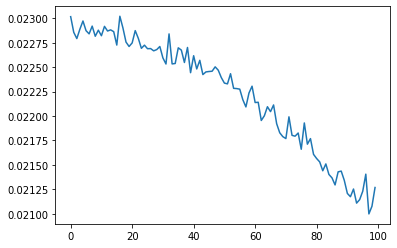

In [302]:
plt.plot(history.history['loss'])
plt.show()

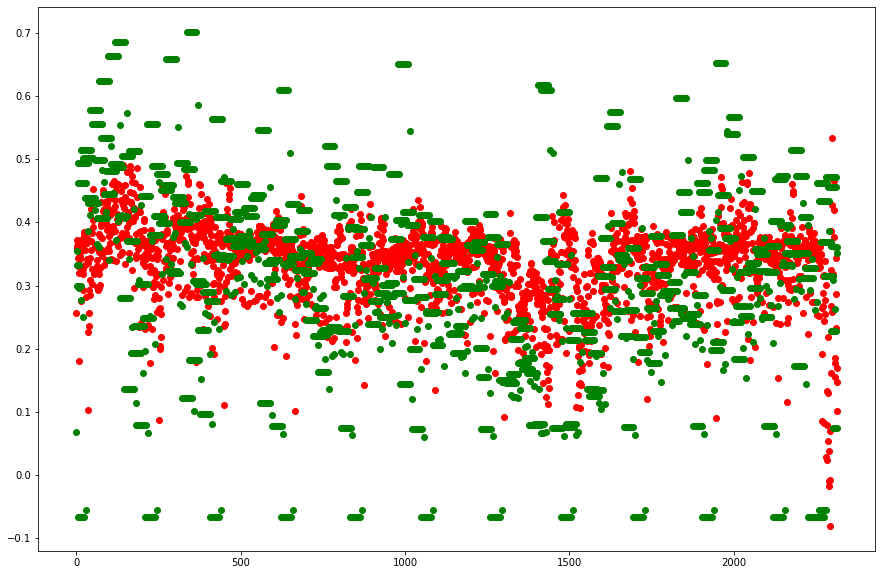

In [303]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.scatter(range(y_pred.size),y_pred,c='r')
plt.scatter(range(y_test.size),y_test,c='g')
plt.show()

In [304]:
#convert y_pred values to their original forms 

y_pred = y_scaler.inverse_transform(y_pred)

In [305]:
y_pred

array([[1413.9628 , 1600.3695 , 1618.8322 , ..., 1631.2054 , 1548.0544 ,
        1502.0656 ],
       [1068.7625 , 1458.2485 , 1602.7886 , ..., 1608.5605 , 1561.2245 ,
        1485.176  ],
       [1496.2261 , 1658.7568 , 1596.2291 , ..., 1623.2446 , 1484.3711 ,
        1454.8467 ],
       ...,
       [1458.8336 , 1711.7086 , 1476.8397 , ..., 2268.8037 , 1224.7272 ,
        1236.5222 ],
       [1686.7045 , 1618.6646 , 1677.0914 , ..., 1836.69   ,  837.47406,
         923.182  ],
       [1084.6776 , 1130.3785 , 1552.0925 , ...,  893.45685,  633.66736,
         805.00226]], dtype=float32)

In [306]:
y_true = y_scaler.inverse_transform(y_test)

In [307]:
y_true

array([[ 555.664, 1593.318, 1504.82 , ...,    0.   , 1995.796, 2116.224],
       [1593.318, 1504.82 , 1383.18 , ..., 1995.796, 2116.224, 2196.76 ],
       [1504.82 , 1383.18 ,    0.   , ..., 2116.224, 2196.76 , 2150.112],
       ...,
       [1892.998, 1645.424, 1439.426, ..., 1973.382, 1109.574,  529.698],
       [1645.424, 1439.426, 2035.418, ..., 1109.574,  529.698, 1612.092],
       [1439.426, 2035.418, 1973.382, ...,  529.698, 1612.092, 1579.692]])

# Evaluate the Model

In [308]:
def evaluate_model(y_true, y_predicted):
    scores = []
    
    #calculate scores for each day
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:, i], y_predicted[:, i])
        rmse = np.sqrt(mse)
        scores.append(rmse)
    
    #calculate score for whole prediction
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_predicted.shape[1]):
            total_score = total_score + (y_true[row, col] - y_predicted[row, col])**2
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_predicted.shape[1]))
    
    return total_score, scores

#mean squared error is used as the performance metrics

In [309]:
evaluate_model(y_true, y_pred)

(590.3042141914358,
 [563.1023813290266,
  589.601227773674,
  589.9955466914901,
  610.0571140568534,
  608.7696848054018,
  593.3378816345044,
  575.8339682120007])

In [310]:
#standard deviation

np.std(y_true[0])

710.0253857243847

Mean squared error is around 563 watts. Standard deviation is 710 watts for this model.

This LSTM model is performing good as the mean squared error is less than standard deviation.